In [1]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df=pd.read_csv('gdrive/My Drive/final_fixed_scrapped.csv')

In [3]:
df

,Unnamed: 0,Title,Article,totalwords
0,0,Rs 400-cr ‘bungling’ by Amar Singh: HC seeks E...,The Allahabad High Court has directed the Enfo...,341
1,1,J&K HC orders FIR against teacher who fails to...,The J&K High Court on Friday asked a teacher t...,335
2,2,Crime in Cyberia: an incomplete list of offenders,An unknown Indian hacker has been charged with...,382
3,3,450 cannabis plants found on govt land in Mundhwa,The interrogation of two marijuana peddlers ab...,372
4,4,"Nagaland: 9 bullet-riddled bodies found,Karbi-...",Nine highly decomposed bodies were found stack...,449
...,...,...,...,...
7838,7838,"13 dead, one million evacuated in China after ...",At least 18 people were killed due to a landsl...,397
7839,7839,"Book Karnataka, Maharashtra CMs for culpable h...",With the flood situation in the state continui...,500
7840,7840,Romanian researcher develops disc-shaped flyin...,"Razan Sabie, an aerodynamicist who operates fr...",346
7841,7841,Is asteroid Apophis capable of triggering a ts...,It was around a few months back that Iain McDo...,412


In [ ]:
df.describe()

,Unnamed: 0,totalwords
count,7843.000000,7843.000000
mean,3921.000000,518.458116
std,2264.223414,443.567008
min,0.000000,100.000000
25%,1960.500000,285.000000
50%,3921.000000,389.000000
75%,5881.500000,595.000000
max,7842.000000,5884.000000


In [ ]:
##200 WPM

In [4]:
list=df['totalwords'].tolist()

In [5]:
round(10.567,2)

10.57

In [6]:
time=[]
for i in range(7843):
  time.append(round((60*(list[i]/200)),2))


In [7]:
df['average_reading_time(sec)']=time

In [32]:
df.describe()

,Unnamed: 0,totalwords,average_reading_time(sec)
count,7843.000000,7843.000000,7843.000000
mean,3921.000000,518.458116,155.537435
std,2264.223414,443.567008,133.070102
min,0.000000,100.000000,30.000000
25%,1960.500000,285.000000,85.500000
50%,3921.000000,389.000000,116.700000
75%,5881.500000,595.000000,178.500000
max,7842.000000,5884.000000,1765.200000


In [8]:
counts=df['average_reading_time(sec)'].value_counts()

In [9]:
counts

96.3     33
91.5     28
87.9     28
95.4     28
87.6     27
         ..
353.7     1
590.7     1
434.7     1
478.5     1
367.8     1
Name: average_reading_time(sec), Length: 1399, dtype: int64

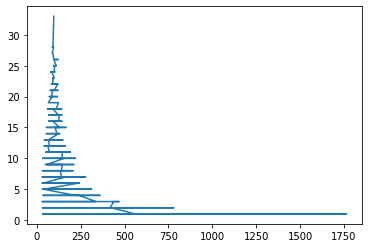

In [10]:
ax=counts.plot()

In [120]:
l=ax.get_lines()[0].get_xydata()

In [121]:
np.shape(l)

(1399, 2)

In [13]:
l.astype(int)

array([[ 96,  33],
       [ 91,  28],
       [ 87,  28],
       ...,
       [434,   1],
       [478,   1],
       [367,   1]])

In [15]:
x_data=l[:,0]
y_data=l[:,1]
len(x_data)


1399

In [16]:
#x_data.astype(int)
#y_data.astype(int)


In [ ]:
x_data=x_data.reshape(-1, 1)

In [126]:
import pandas as pd
data = l

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=12)
model=gmm.fit(data)

In [130]:
Xnew, Ynew = model.sample(10000)  # if Ynew is valuable


In [131]:
np.mean(Xnew[:,0])

293.1678655731778

In [132]:
Xnew

array([[119.24535746,  16.86758287],
       [124.22986521,  10.46930794],
       [103.03586647,  18.04887169],
       ...,
       [212.06624362,   2.0012011 ],
       [486.38218164,   2.00110494],
       [339.7343098 ,   1.9995608 ]])

In [80]:
t=[1]

[5]


In [137]:
def sample(i):
    flag = True
    while flag:
      Xnew, Ynew = model.sample(i)
      if Xnew[0][0]<0:
         flag=True
     #print(Xnew[0][0])
      else: flag=False
    return(Xnew[0][0])

      


In [146]:
sample(1)

21.558585324378008

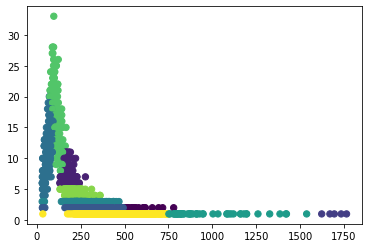

In [20]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=12).fit(l)
labels = gmm.predict(l)
plt.scatter(l[:, 0], l[:, 1], c=labels, s=40, cmap='viridis');

In [21]:
probs = gmm.predict_proba(l)
np.shape(probs)

(1399, 12)

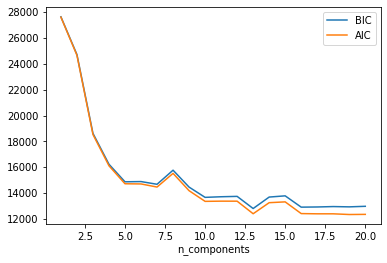

In [22]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(l)
          for n in n_components]

plt.plot(n_components, [m.bic(l) for m in models], label='BIC')
plt.plot(n_components, [m.aic(l) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [262]:
s = np.random.poisson(2, 1000)

In [268]:
flag = True
while flag:
   s = np.random.poisson(2, 1)
   if s[0]== 0:
     flag=True
     print(s[0])
   else: flag=False
   print(s[0])

3


In [203]:
## Clickstream generator lists
l=[]## reference list
for i in range(10000):
  flag = True
  while flag:
      s = np.random.poisson(2, 1)
      if s[0]> 0:
        l.append(s[0])
        flag=False
        
      else: flag=True
user_id=[]
k=1
for i in range(len(l)):
  for j in range(l[i]*10):
    user_id.append(k)
  k=k+1
rank=[]
t=[1,2,3,4,5,6,7,8,9,10]
for i in range(len(l)):
  for j in range(l[i]):
    rank=rank+t  


q=[]## click list
for i in range(len(l)):
  for j in range(l[i]):
      r=np.random.poisson(5, 1)
      t=np.random.binomial(1,0.5,size=10)
      min=np.minimum(r,sum(t))
      #print(min)
      j=0
      a=0
      while j < min:
        if t[a]==1:
          j=j+1
          a=a+1
        else: a=a+1
 
      t_=t[0:a]
      t_=t_.tolist()

      for i in range(10-a):
          t_=t_ + [0]
      q=q+t_
click=[]
read_time=[]
for i in range(len(q)):
  if q[i]==0:
     click.append('No')
  else: click.append('Yes')
for i in range(len(q)):
  if q[i]==0:
     read_time.append('NaN')
  else: read_time.append(sample(1))            
article_id=[]
for i in range(len(user_id)):
  article_id.append(np.random.randint(0,7843)) 
#session id
sessionid=[]

for j in l:
  for k in range(j):
      t=k+1
      t_=[t for i in range(10)]
      sessionid=sessionid+t_       
      


In [200]:
#session id
sessionid=[]

for j in l:
  for k in range(j):
      t=k+1
      t_=[t for i in range(10)]
      sessionid=sessionid+t_
      




In [202]:
len(sessionid)

2080

In [195]:
print(l)

[2, 1, 2, 2, 1, 2, 1, 4, 2, 2, 3, 1, 1, 2, 1, 2, 1, 2, 4, 1, 2, 3, 1, 4, 1, 3, 2, 2, 2, 3, 2, 2, 1, 3, 1, 2, 2, 1, 1, 3, 2, 2, 1, 1, 3, 2, 2, 3, 2, 1, 2, 2, 5, 1, 6, 1, 1, 2, 1, 2, 2, 4, 1, 3, 4, 1, 1, 1, 2, 2, 1, 2, 3, 3, 1, 1, 4, 2, 1, 1, 2, 2, 1, 4, 3, 1, 5, 1, 4, 1, 2, 1, 6, 3, 2, 3, 1, 2, 2, 2]


In [201]:
sum(l)

208

In [199]:
len(user_id)

2080

In [205]:
click_stream = pd.DataFrame(
    {'User_ID': user_id,
     'Session_ID':sessionid ,
     'Article_ID': article_id,
     'Article_rank': rank,
     'Click': click,
     'Time_spent': read_time
                          })

In [209]:
click_stream

,User_ID,Session_ID,Article_ID,Article_rank,Click,Time_spent
0,1,1,5095,1,No,NaN
1,1,1,4650,2,Yes,546.345
2,1,1,2438,3,Yes,609.483
3,1,1,643,4,No,NaN
4,1,1,3333,5,Yes,303.778
...,...,...,...,...,...,...
230705,10000,3,6173,6,No,NaN
230706,10000,3,1375,7,No,NaN
230707,10000,3,5213,8,No,NaN
230708,10000,3,4959,9,No,NaN


In [210]:
click_stream.to_csv('clickstream.csv')

In [212]:
from google.colab import files
files.download("clickstream.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [179]:
f=[1 for i in range(5)]

In [180]:
f

[1, 1, 1, 1, 1]

In [115]:
q=[]## Rank list
for i in range(len(l)):
  for j in range(l[i]):
      r=np.random.poisson(5, 1)
      t=np.random.binomial(1,0.5,size=10)
      min=np.minimum(r,sum(t))
      #print(min)
      j=0
      a=0
      while j < min:
        if t[a]==1:
          j=j+1
          a=a+1
        else: a=a+1
 
      t_=t[0:a]
      t_=t_.tolist()

      for i in range(10-a):
          t_=t_ + [0]
      q=q+t_    
  







In [118]:
len(q)
#len(user_id)



 
   


150

In [116]:
sum(l)

15

In [77]:
t_.tolist()+[0]

[1, 0, 1, 0]

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [47]:
[0]*(9)

[0, 0, 0, 0, 0, 0, 0, 0, 0]